In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import os

japanize_matplotlib.japanize() 

### データクリーニング

In [125]:
maikin_data = pd.read_csv('./data/maikin-data.csv', encoding='shift_jis', low_memory=False)

In [126]:
maikin_data.head()

,種別,年,月,産業分類,規模,就業形態,現金給与総額,きまって支給する給与,所定内給与,所定外給与,特別給与,総実労働時間,所定内労働時間,所定外労働時間,出勤日数,前月末労働者数,増加労働者数,減少労働者数,本月末労働者数,パートタイム労働者数
0,実数,1960,CY,C,0,0,26250,22547.0,NaN,NaN,3703.0,193.6,170.8,22.8,23.0,NaN,NaN,NaN,NaN,NaN
1,実数,1960,CY,C,4,0,28786,24682.0,NaN,NaN,NaN,193.2,168.4,24.8,22.8,NaN,NaN,NaN,NaN,NaN
2,実数,1960,CY,C,5,0,22422,19121.0,NaN,NaN,NaN,196.7,175.1,21.6,23.5,NaN,NaN,NaN,NaN,NaN
3,実数,1960,CY,C,7,0,18826,16814.0,NaN,NaN,NaN,187.9,176.3,11.6,23.4,NaN,NaN,NaN,NaN,NaN
4,実数,1960,CY,D,0,0,21213,17952.0,NaN,NaN,3261.0,211.0,186.4,24.6,24.1,NaN,NaN,NaN,NaN,NaN


In [127]:
maikin_data.isna().sum()

種別                0
年                 0
月                 0
産業分類              0
規模                0
就業形態              0
現金給与総額            0
きまって支給する給与        3
所定内給与         13510
所定外給与         18875
特別給与           9874
総実労働時間         3240
所定内労働時間        3600
所定外労働時間        4668
出勤日数              0
前月末労働者数       17221
増加労働者数        18491
減少労働者数        18378
本月末労働者数       17753
パートタイム労働者数    87464
dtype: int64

In [128]:
maikin_data.dtypes

種別             object
年               int64
月              object
産業分類           object
規模             object
就業形態            int64
現金給与総額          int64
きまって支給する給与    float64
所定内給与         float64
所定外給与         float64
特別給与          float64
総実労働時間        float64
所定内労働時間       float64
所定外労働時間       float64
出勤日数          float64
前月末労働者数       float64
増加労働者数        float64
減少労働者数        float64
本月末労働者数       float64
パートタイム労働者数    float64
dtype: object

In [129]:
# 列"月"のデータを整形
# まず全角を半角に変換
maikin_data.loc[:, "月"] = maikin_data.loc[:, "月"].astype(str).str.normalize('NFKC')

# "CY"以外の数字の先頭0を削除
def format_month(month_str):
    if month_str == "CY":
        return month_str
    try:
        # 数字に変換できる場合は整数に変換して文字列に戻す(先頭0が削除される)
        return str(int(month_str))
    except ValueError:
        # 数字に変換できない場合はそのまま返す
        return month_str

maikin_data.loc[:, "月"] = maikin_data.loc[:, "月"].apply(format_month)
maikin_data.loc[:, "月"].value_counts()

月
1     15585
2     15583
5     15583
7     15582
3     15582
6     15581
8     15580
4     15579
CY    15205
9     15050
12    15050
11    15048
10    15046
Name: count, dtype: int64

In [130]:
# 産業分類を半角に変換し、前後の空白を削除
maikin_data.loc[:, "産業分類"] = maikin_data.loc[:, "産業分類"].astype(str).str.normalize('NFKC').str.strip()

In [131]:
maikin_data["産業分類"].value_counts()

産業分類
D      9426
E      9426
F      9426
TL     8906
C      8290
       ... 
M77     406
O82     406
Q87     406
R91     406
R92     406
Name: count, Length: 84, dtype: int64

In [132]:
maikin_data["種別"].value_counts()

種別
実数    200054
Name: count, dtype: int64

In [133]:
maikin_data = maikin_data.drop(columns=["種別"])

In [145]:
maikin_data.to_csv("./data/maikin-data_cleaned.csv", encoding="utf-8-sig", index=False)

### 製造業のデータ抽出

In [135]:
# "E"で始まる産業分類のデータを抽出
e_data = maikin_data[maikin_data["産業分類"].str.startswith("E", na=False)]
e_data.head()

,年,月,産業分類,規模,就業形態,現金給与総額,きまって支給する給与,所定内給与,所定外給与,特別給与,総実労働時間,所定内労働時間,所定外労働時間,出勤日数,前月末労働者数,増加労働者数,減少労働者数,本月末労働者数,パートタイム労働者数
8,1960,CY,E,0,0,22630,18319.0,NaN,NaN,4311.0,207.0,182.0,25.0,24.2,NaN,NaN,NaN,NaN,NaN
9,1960,CY,E,4,0,28690,22409.0,NaN,NaN,NaN,200.3,173.8,26.5,24.2,NaN,NaN,NaN,NaN,NaN
10,1960,CY,E,5,0,20293,16501.0,NaN,NaN,NaN,207.9,184.9,23.0,24.1,NaN,NaN,NaN,NaN,NaN
11,1960,CY,E,7,0,16897,14742.0,NaN,NaN,NaN,215.3,190.2,25.1,24.3,NaN,NaN,NaN,NaN,NaN
12,1960,CY,E12,0,0,15370,13448.0,NaN,NaN,1922.0,208.5,186.6,21.9,23.9,NaN,NaN,NaN,NaN,NaN


In [86]:
e_data.isna().sum()

種別                0
年                 0
月                 0
産業分類              0
規模                0
就業形態              0
現金給与総額            0
きまって支給する給与        3
所定内給与         10008
所定外給与         13593
特別給与           5978
総実労働時間         3240
所定内労働時間        3600
所定外労働時間        3240
出勤日数              0
前月末労働者数       12740
増加労働者数        12814
減少労働者数        12771
本月末労働者数       13077
パートタイム労働者数    21073
dtype: int64

<Axes: xlabel='月'>

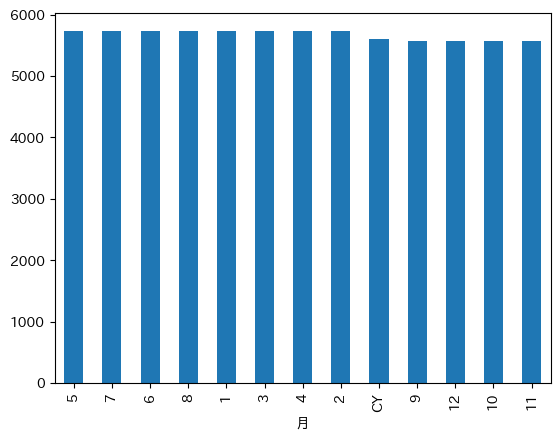

In [143]:
e_data["月"].value_counts().plot(kind='bar')

- 月データの"CY"ってなんだ？
    - 年平均らしい

In [40]:
# デバッグ: 産業分類の値を確認
print("産業分類のユニークな値:")
print(e_data["産業分類"].unique())
print("\n産業分類の値のカウント:")
print(e_data["産業分類"].value_counts())
print("\n'E'と完全一致する行数:")
print(len(e_data[e_data["産業分類"] == "E"]))
print("\n最初の数行の産業分類の値(repr形式):")
for val in e_data["産業分類"].head(10):
    print(repr(val))

産業分類のユニークな値:
['E   ' 'E12 ' 'E13 ' 'E14 ' 'E19 ' 'E21 ' 'E22 ' 'E23 ' 'E24 ' 'E31 '
 'E18 ' 'E-2 ' 'E-1 ' 'E-3 ' 'E09 ' 'E15 ' 'E28 ' 'E11 ' 'E16 ' 'E25 '
 'E26 ' 'E27 ' 'E29 ' 'E30 ' 'E32 ']

産業分類の値のカウント:
産業分類
E       9426
E19     4338
E14     4338
E22     4338
E21     4338
E23     4338
E24     4338
E31     4338
E13     4249
E12     4031
E18     3058
E-2     2882
E-1     1998
E-3     1998
E09     1998
E15     1998
E28     1998
E11     1218
E16     1218
E25     1218
E26     1218
E27     1218
E29     1218
E30     1218
E32     1218
Name: count, dtype: int64

'E'と完全一致する行数:
0

最初の数行の産業分類の値(repr形式):
'E   '
'E   '
'E   '
'E   '
'E12 '
'E12 '
'E12 '
'E12 '
'E13 '
'E13 '


In [60]:
e_data.describe()

,年,就業形態,現金給与総額,きまって支給する給与,所定内給与,所定外給与,特別給与,総実労働時間,所定内労働時間,所定外労働時間,出勤日数,前月末労働者数,増加労働者数,減少労働者数,本月末労働者数,パートタイム労働者数
count,73746.000000,73746.000000,7.374600e+04,73743.000000,63738.000000,60153.000000,6.776800e+04,70506.000000,70146.000000,70506.000000,73746.000000,6.100600e+04,60932.000000,60975.000000,6.066900e+04,5.267300e+04
mean,2002.337591,0.103490,3.263944e+05,259534.270914,259867.360664,29958.543414,7.208556e+04,165.625144,150.551949,14.939017,20.147844,6.962970e+05,8826.085489,9195.684346,6.639229e+05,6.486726e+04
std,17.362097,0.402214,1.856110e+05,100053.786479,57403.043294,13783.770934,1.366321e+05,16.572365,13.633022,5.140696,1.725360,1.474125e+06,22861.025444,20601.060459,1.404815e+06,1.558612e+05
min,1960.000000,0.000000,1.200100e+04,9750.000000,72798.000000,718.000000,0.000000e+00,78.100000,77.500000,0.600000,13.300000,1.099000e+03,1.000000,1.000000,1.092000e+03,1.000000e+00
25%,1992.000000,0.000000,2.392250e+05,221672.000000,227278.000000,19652.000000,2.674750e+03,157.200000,143.400000,11.700000,19.000000,6.646850e+04,580.000000,688.000000,6.601800e+04,4.050000e+03
50%,2007.000000,0.000000,3.081505e+05,279363.000000,262664.500000,29427.000000,1.120100e+04,166.500000,151.200000,14.900000,20.000000,1.581805e+05,1668.000000,1891.000000,1.563090e+05,1.224600e+04
75%,2016.000000,0.000000,3.841852e+05,329036.000000,298667.500000,38810.000000,6.600975e+04,174.900000,158.400000,18.000000,21.100000,5.637682e+05,7216.000000,7692.500000,5.553610e+05,3.864700e+04
max,2025.000000,2.000000,1.651618e+06,505652.000000,454661.000000,90851.000000,1.235666e+06,228.000000,200.400000,41.500000,25.700000,1.184519e+07,525784.000000,268802.000000,1.184519e+07,1.399439e+06


In [144]:
e_data.to_csv('./data/maikin_data_e_cleaned.csv', index=False, encoding='utf_8_sig')

### 前処理

In [64]:
e_data = pd.read_csv('./data/maikin_data_e_cleaned.csv', encoding='utf_8_sig')
e_data.head()

C:\Users\chika\AppData\Local\Temp\ipykernel_14256\1630748039.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  maikin_data_e = pd.read_csv('./data/maikin_data_e_cleaned.csv', encoding='utf_8_sig')


,種別,年,月,産業分類,規模,就業形態,現金給与総額,きまって支給する給与,所定内給与,所定外給与,特別給与,総実労働時間,所定内労働時間,所定外労働時間,出勤日数,前月末労働者数,増加労働者数,減少労働者数,本月末労働者数,パートタイム労働者数
0,実数,1960,CY,E,0,0,22630,18319.0,NaN,NaN,4311.0,207.0,182.0,25.0,24.2,NaN,NaN,NaN,NaN,NaN
1,実数,1960,CY,E,4,0,28690,22409.0,NaN,NaN,NaN,200.3,173.8,26.5,24.2,NaN,NaN,NaN,NaN,NaN
2,実数,1960,CY,E,5,0,20293,16501.0,NaN,NaN,NaN,207.9,184.9,23.0,24.1,NaN,NaN,NaN,NaN,NaN
3,実数,1960,CY,E,7,0,16897,14742.0,NaN,NaN,NaN,215.3,190.2,25.1,24.3,NaN,NaN,NaN,NaN,NaN
4,実数,1960,CY,E12,0,0,15370,13448.0,NaN,NaN,1922.0,208.5,186.6,21.9,23.9,NaN,NaN,NaN,NaN,NaN


In [65]:
# 大区分だけを抽出
e_data = e_data[e_data["産業分類"] == "E"]
e_data.head()

,種別,年,月,産業分類,規模,就業形態,現金給与総額,きまって支給する給与,所定内給与,所定外給与,特別給与,総実労働時間,所定内労働時間,所定外労働時間,出勤日数,前月末労働者数,増加労働者数,減少労働者数,本月末労働者数,パートタイム労働者数
0,実数,1960,CY,E,0,0,22630,18319.0,NaN,NaN,4311.0,207.0,182.0,25.0,24.2,NaN,NaN,NaN,NaN,NaN
1,実数,1960,CY,E,4,0,28690,22409.0,NaN,NaN,NaN,200.3,173.8,26.5,24.2,NaN,NaN,NaN,NaN,NaN
2,実数,1960,CY,E,5,0,20293,16501.0,NaN,NaN,NaN,207.9,184.9,23.0,24.1,NaN,NaN,NaN,NaN,NaN
3,実数,1960,CY,E,7,0,16897,14742.0,NaN,NaN,NaN,215.3,190.2,25.1,24.3,NaN,NaN,NaN,NaN,NaN
40,実数,1961,CY,E,0,0,24786,19725.0,NaN,NaN,5061.0,203.4,179.4,24.0,23.8,NaN,NaN,NaN,NaN,NaN


In [66]:
# 従業員規模が500人以上のデータを抽出
e_4_data = e_data[e_data["規模"] == "4"]
e_4_data.head()

,種別,年,月,産業分類,規模,就業形態,現金給与総額,きまって支給する給与,所定内給与,所定外給与,特別給与,総実労働時間,所定内労働時間,所定外労働時間,出勤日数,前月末労働者数,増加労働者数,減少労働者数,本月末労働者数,パートタイム労働者数
1,実数,1960,CY,E,4,0,28690,22409.0,NaN,NaN,NaN,200.3,173.8,26.5,24.2,NaN,NaN,NaN,NaN,NaN
41,実数,1961,CY,E,4,0,30712,23610.0,NaN,NaN,NaN,197.6,171.7,25.9,23.8,NaN,NaN,NaN,NaN,NaN
81,実数,1962,CY,E,4,0,32643,25239.0,NaN,NaN,NaN,192.6,171.8,20.8,23.8,NaN,NaN,NaN,NaN,NaN
121,実数,1963,CY,E,4,0,35745,27432.0,NaN,NaN,NaN,190.8,170.2,20.6,23.6,NaN,NaN,NaN,NaN,NaN
161,実数,1964,CY,E,4,0,39195,30159.0,NaN,NaN,NaN,191.0,169.0,22.0,23.4,NaN,NaN,NaN,NaN,NaN


In [73]:
# デバッグ: 就業形態の値を確認
print("就業形態のユニークな値:")
print(e_4_data["就業形態"].unique())
print("\n産業分類の値のカウント:")
print(e_4_data["就業形態"].value_counts())
print("\n'0'と完全一致する行数:")
print(len(e_4_data[e_4_data["就業形態"] == 0]))
print("\n最初の数行の就業形態の値(repr形式):")
for val in e_4_data["就業形態"].head(10):
    print(repr(val))

就業形態のユニークな値:
[0 1 2]

産業分類の値のカウント:
就業形態
0    853
1    424
2    424
Name: count, dtype: int64

'0'と完全一致する行数:
853

最初の数行の就業形態の値(repr形式):
0
0
0
0
0
0
0
0
0
0


In [78]:
# 就業形態が1（正社員？）のデータを抽出
e_4_1_data = e_4_data[e_4_data["就業形態"] == 1]
e_4_1_data.head()

,種別,年,月,産業分類,規模,就業形態,現金給与総額,きまって支給する給与,所定内給与,所定外給与,特別給与,総実労働時間,所定内労働時間,所定外労働時間,出勤日数,前月末労働者数,増加労働者数,減少労働者数,本月末労働者数,パートタイム労働者数
1480,実数,1993,CY,E,4,1,469766,338908.0,303076.0,35832.0,130858.0,163.2,149.5,13.7,19.2,2671075.0,22922.0,27286.0,2666746.0,NaN
1564,実数,1994,CY,E,4,1,477344,347256.0,310720.0,36536.0,130088.0,162.7,149.0,13.7,19.2,2614214.0,18894.0,24703.0,2608322.0,NaN
1648,実数,1995,CY,E,4,1,496154,359119.0,318144.0,40975.0,137035.0,163.7,148.5,15.2,19.2,2555735.0,18176.0,24870.0,2549247.0,NaN
1732,実数,1996,CY,E,4,1,510211,370595.0,325038.0,45557.0,139616.0,164.7,147.9,16.8,19.2,2479825.0,19097.0,24471.0,2474476.0,NaN
1816,実数,1997,CY,E,4,1,529972,382708.0,332176.0,50532.0,147264.0,165.8,147.4,18.4,19.1,2429833.0,20882.0,24371.0,2426426.0,NaN


In [94]:
e_4_1_data[e_4_1_data["年"] == 2020]

,種別,年,月,産業分類,規模,就業形態,現金給与総額,きまって支給する給与,所定内給与,所定外給与,特別給与,総実労働時間,所定内労働時間,所定外労働時間,出勤日数,前月末労働者数,増加労働者数,減少労働者数,本月末労働者数,パートタイム労働者数
4802,実数,2020,CY,E,4,1,530805,396774.0,353137.0,43637.0,134031.0,159.6,143.7,15.9,18.5,1857582.0,16202.0,16212.0,1857579.0,NaN
62802,実数,2020,1,E,4,1,415550,400808.0,352344.0,48464.0,14742.0,156.9,138.9,18.0,17.9,1829043.0,11595.0,17856.0,1822808.0,NaN
62963,実数,2020,2,E,4,1,404804,402518.0,351285.0,51233.0,2286.0,161.1,142.3,18.8,18.3,1825933.0,8001.0,12479.0,1821465.0,NaN
63124,実数,2020,3,E,4,1,426032,404254.0,352949.0,51305.0,21778.0,165.9,146.8,19.1,18.9,1821356.0,17223.0,20085.0,1818480.0,NaN
63285,実数,2020,4,E,4,1,410538,399844.0,356383.0,43461.0,10694.0,166.1,150.9,15.2,19.4,1820055.0,78946.0,29028.0,1870104.0,NaN
63446,実数,2020,5,E,4,1,404065,381797.0,349805.0,31992.0,22268.0,138.2,127.0,11.2,16.3,1874975.0,13264.0,17172.0,1871022.0,NaN
63607,実数,2020,6,E,4,1,736498,383486.0,351584.0,31902.0,353012.0,152.6,140.9,11.7,18.0,1875823.0,10397.0,13800.0,1872412.0,NaN
63768,実数,2020,7,E,4,1,790892,391941.0,353755.0,38186.0,398951.0,167.7,153.9,13.8,19.7,1876286.0,10410.0,14520.0,1872100.0,NaN
63929,実数,2020,8,E,4,1,395649,391312.0,351035.0,40277.0,4337.0,146.2,132.0,14.2,17.0,1878328.0,8280.0,13286.0,1873319.0,NaN
64090,実数,2020,9,E,4,1,402360,396502.0,353431.0,43071.0,5858.0,159.0,143.2,15.8,18.4,1879986.0,7994.0,13916.0,1874112.0,NaN


In [81]:
e_4_1_data.isna().sum()

種別              0
年               0
月               0
産業分類            0
規模              0
就業形態            0
現金給与総額          0
きまって支給する給与      0
所定内給与           0
所定外給与           0
特別給与            0
総実労働時間          0
所定内労働時間         0
所定外労働時間         0
出勤日数            0
前月末労働者数         0
増加労働者数          0
減少労働者数          0
本月末労働者数         0
パートタイム労働者数    424
dtype: int64

In [95]:
e_4_1_cy_data = e_4_1_data[e_4_1_data["月"] == "CY"]

In [96]:
# 不要な列をドロップ
e_4_1_cy_data = e_4_1_cy_data.drop(columns=["種別","月","産業分類","規模","就業形態","パートタイム労働者数"], axis=1)
e_4_1_cy_data.head()

,年,現金給与総額,きまって支給する給与,所定内給与,所定外給与,特別給与,総実労働時間,所定内労働時間,所定外労働時間,出勤日数,前月末労働者数,増加労働者数,減少労働者数,本月末労働者数
1480,1993,469766,338908.0,303076.0,35832.0,130858.0,163.2,149.5,13.7,19.2,2671075.0,22922.0,27286.0,2666746.0
1564,1994,477344,347256.0,310720.0,36536.0,130088.0,162.7,149.0,13.7,19.2,2614214.0,18894.0,24703.0,2608322.0
1648,1995,496154,359119.0,318144.0,40975.0,137035.0,163.7,148.5,15.2,19.2,2555735.0,18176.0,24870.0,2549247.0
1732,1996,510211,370595.0,325038.0,45557.0,139616.0,164.7,147.9,16.8,19.2,2479825.0,19097.0,24471.0,2474476.0
1816,1997,529972,382708.0,332176.0,50532.0,147264.0,165.8,147.4,18.4,19.1,2429833.0,20882.0,24371.0,2426426.0


In [114]:
e_4_1_cy_data.to_csv('./data/e-4-1-cy_maikin_data.csv', index=False, encoding='utf_8_sig')

In [ ]:
xticks = e_4_1_cy_data["年"].unique()
xticks.sort()
xticks = list(xticks)

In [117]:
xticks = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]
yticks = [300000, 350000, 400000, 450000, 500000, 550000, 600000]

<Axes: xlabel='年'>

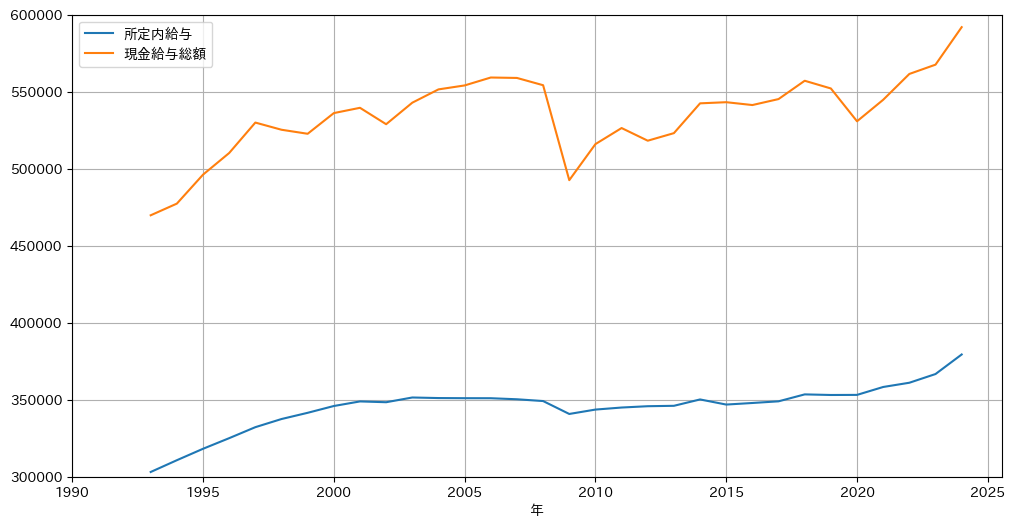

In [118]:
e_4_1_cy_data.plot(
    kind="line", 
    figsize=(12, 6), 
    x="年", 
    y=["所定内給与","現金給与総額"],
    ylim=(300000, 600000),
    grid=True,
    xticks=xticks,
    yticks=yticks
    )

<Axes: xlabel='年'>

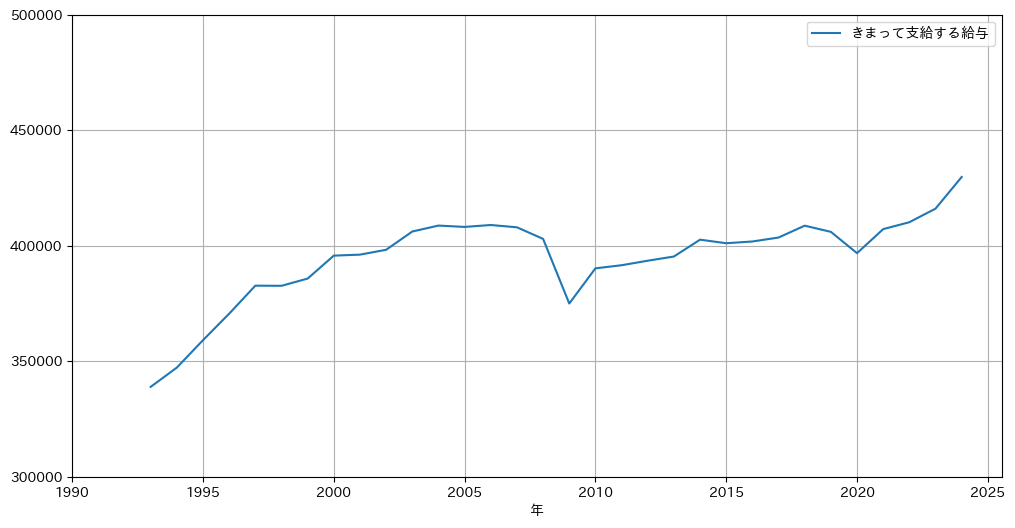

In [110]:
e_4_1_cy_data.plot(
    kind="line", 
    figsize=(12, 6), 
    x="年", 
    y="きまって支給する給与",
    ylim=(300000, 500000),
    grid=True,
    xticks=xticks,
    yticks=yticks
    )

<Axes: xlabel='年'>

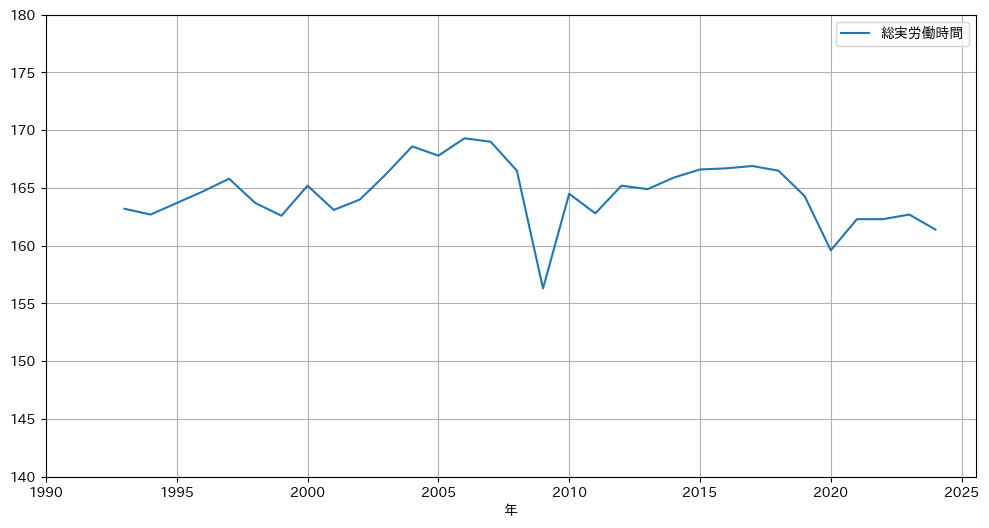

In [113]:
e_4_1_cy_data.plot(
    kind="line", 
    figsize=(12, 6), 
    x="年", 
    y="総実労働時間",
    grid=True,
    ylim=(140, 180),
    xticks=xticks,
    )

<Axes: xlabel='年'>

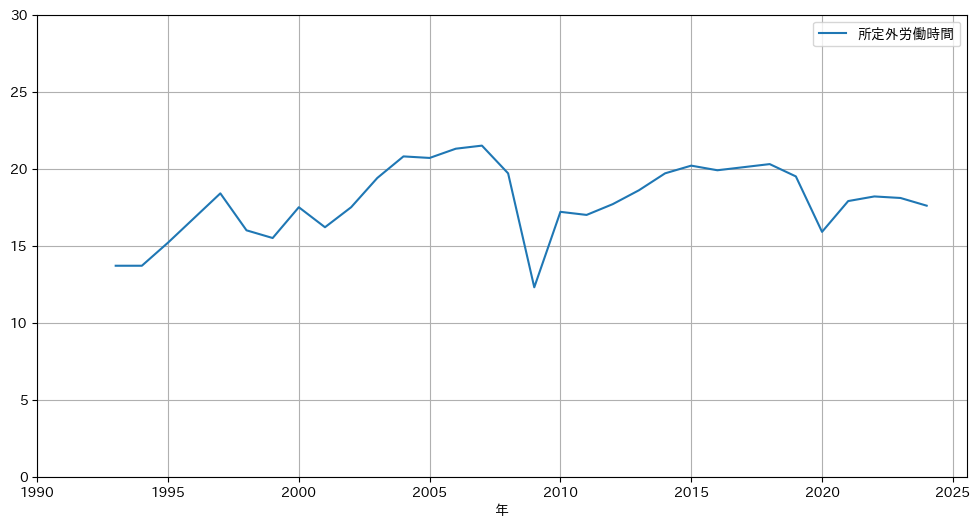

In [121]:
e_4_1_cy_data.plot(
    kind="line", 
    figsize=(12, 6), 
    x="年", 
    y="所定外労働時間",
    grid=True,
    ylim=(0, 30),
    xticks=xticks,
    )

<Axes: xlabel='年'>

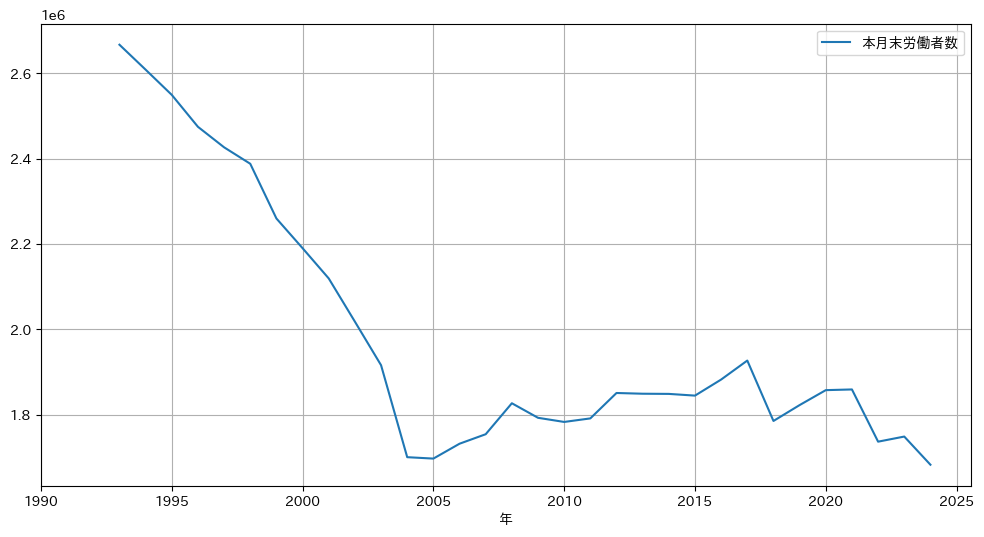

In [115]:
e_4_1_cy_data.plot(
    kind="line", 
    figsize=(12, 6), 
    x="年", 
    y="本月末労働者数",
    grid=True,
    xticks=xticks,
    )

<Axes: xlabel='年'>

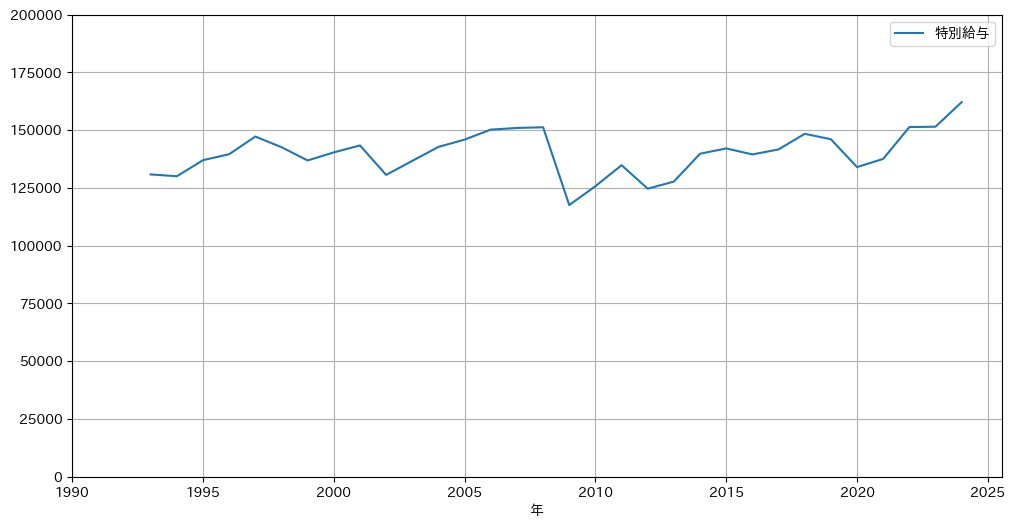

In [119]:
e_4_1_cy_data.plot(
    kind="line", 
    figsize=(12, 6), 
    x="年", 
    y="特別給与",
    ylim=(0, 200000),
    grid=True,
    xticks=xticks,
    # yticks=yticks
    )